In [1]:
from pymongo import MongoClient
from collections import OrderedDict

import numpy

import matplotlib.pyplot as plt

In [2]:
client = MongoClient('localhost')
print("Authentatied for spectral_profiler:", client.spectral_profiler.authenticate('owner', 'data'))
print("Authentatied for selene:", client.selene.authenticate('owner', 'data'))

Authentatied for spectral_profiler: True
Authentatied for selene: True


In [10]:
point_data = client.selene.points

wavelengths = [512.6, 518.4, 524.7, 530.4, 536.5, 542.8, 548.7, 554.5, 560.5, 566.7, 572.6, 578.5, 584.5, 590.6, 596.7, 602.5, 608.6, 614.6, 620.5, 626.7, 632.7, 638.6, 644.6, 650.6, 656.6, 662.6, 668.8, 674.7, 680.6, 686.7, 692.6, 698.6, 704.7, 710.8, 716.7, 722.7, 728.7, 734.7, 740.7, 746.8, 752.8, 758.7, 764.8, 770.7, 776.7, 782.7, 788.8, 794.7, 800.7, 806.8, 812.7, 818.7, 824.8, 830.8, 836.8, 842.8, 848.8, 854.6, 860.7, 866.7, 872.7, 878.7, 884.6, 890.7, 896.6, 902.7, 908.7, 914.6, 920.6, 926.6, 932.6, 938.6, 944.6, 950.6, 955.4, 963.5, 971.4, 979.7, 987.6, 993.7, 1013.1, 1019.5, 1027.7, 1035.5, 1043.6, 1051.7, 1059.7, 1067.8, 1075.8, 1083.6, 1091.8, 1099.7, 1107.7, 1115.9, 1123.8, 1131.8, 1139.7, 1147.8, 1155.7, 1163.8, 1171.8, 1179.8, 1187.8, 1195.8, 1203.9, 1211.9, 1219.8, 1227.9, 1235.9, 1244.0, 1252.0, 1259.8, 1267.8, 1275.9, 1284.2, 1292.0, 1299.8, 1307.8, 1315.9, 1323.8, 1331.8, 1339.8, 1347.8, 1355.8, 1363.8, 1371.8, 1379.8, 1387.8, 1395.9, 1403.8, 1411.8, 1419.8, 1427.9, 1435.7, 1443.8, 1451.9, 1459.8, 1467.8, 1475.8, 1483.9, 1491.8, 1499.8, 1507.8, 1515.7, 1523.8, 1531.7, 1539.7, 1547.7, 1555.5, 1563.7, 1571.7, 1579.6, 1587.7, 1595.7, 1603.7, 1611.7, 1620.1, 1628.1, 1636.1, 1644.2, 1717.6, 1725.6, 1733.7, 1742.0, 1749.7, 1757.7, 1766.3, 1773.6, 1782.2, 1789.8, 1797.6, 1805.8, 1813.7, 1822.0, 1830.0, 1837.6, 1845.6, 1853.7, 1861.8, 1870.1, 1877.3, 1885.7, 1893.7, 1901.5, 1910.0, 1918.0, 1925.3, 1934.3, 1948.8, 1957.6, 1965.9, 1973.3, 1981.3, 1989.4, 1997.7, 2005.8, 2013.0, 2021.5, 2029.3, 2037.4, 2045.8, 2053.3, 2061.3, 2069.4, 2077.0, 2085.5, 2093.0, 2101.9, 2109.2, 2117.0, 2125.4, 2132.9, 2141.5, 2149.0, 2156.8, 2165.2, 2172.8, 2181.0, 2189.4, 2196.8, 2204.7, 2213.0, 2221.2, 2228.7, 2236.8, 2245.0, 2252.5, 2260.7, 2269.2, 2276.6, 2284.7, 2292.7, 2300.4, 2308.9, 2316.4, 2324.0, 2332.6, 2340.6, 2348.3, 2356.2, 2364.6, 2372.2, 2380.2, 2388.5, 2396.2, 2404.2, 2412.2, 2420.2, 2428.0, 2436.3, 2444.3, 2451.9, 2460.1, 2467.9, 2476.0, 2484.1, 2492.6, 2500.1, 2508.1, 2516.1, 2524.1, 2532.1, 2540.0, 2548.0, 2556.0, 2564.0, 2572.0, 2579.9, 2587.9]

In [5]:
# Find all points in circle with radius 100, I would reccomend reducing that number when running the notebook
points = client.selene.points.find({'loc': {'$geoWithin' : {'$center' : [[160.611921773, -73.7620361511], 100]}}})

In [6]:
coordinates = [point['loc']['coordinates'] for point in points]
len(coordinates)

312758

In [7]:
plt.figure(figsize=(40,40))
for point in coordinates:
    plt.scatter(x=point[1], y=point[0], color='b', alpha=.1)

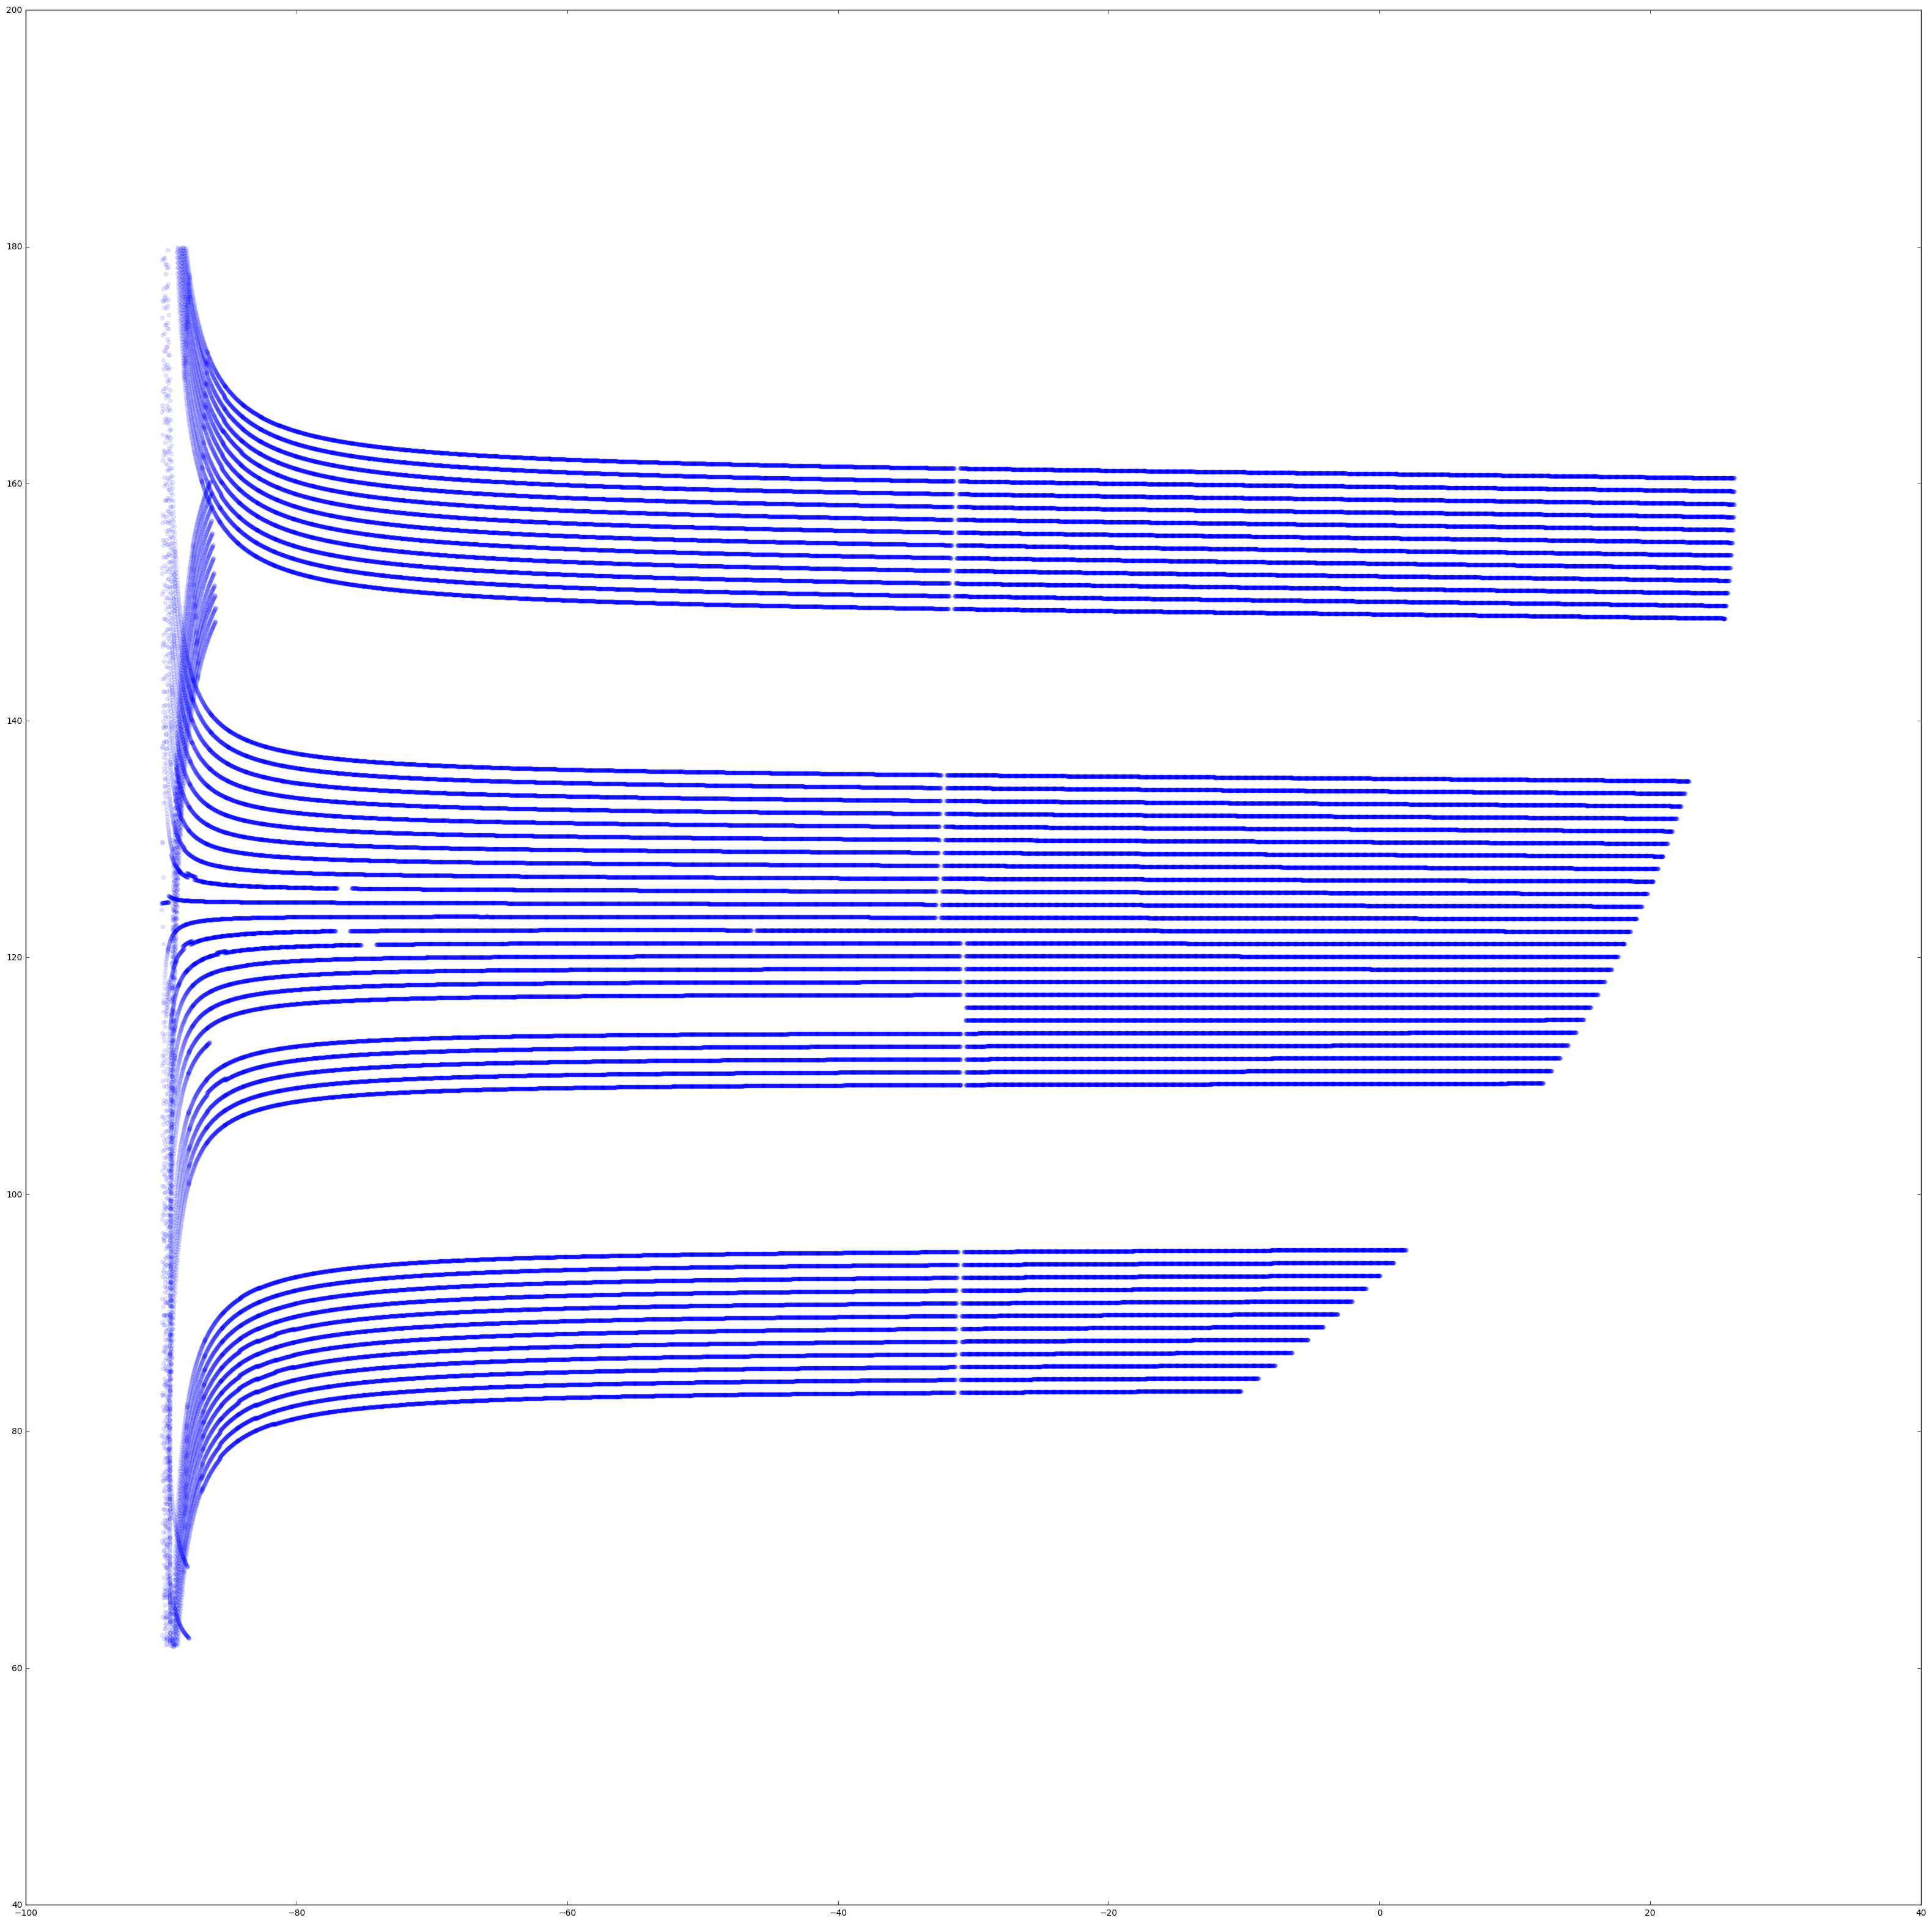

In [8]:
plt.show()

In [13]:
point = point_data.find_one()

In [28]:
def plot_wavelength(refs, **kwargs):
    """
    Plot wavelength intesities. This can be reflectance, radience, raw, etc.
    """
    
    plt.figure(figsize=(9,5))
    plt.plot(wavelengths, refs, color='b', linestyle='-', linewidth = 1, label='Wavelength', **kwargs)
    plt.xlabel('Wavelength')
    plt.ylabel('Intensity')
    plt.show()

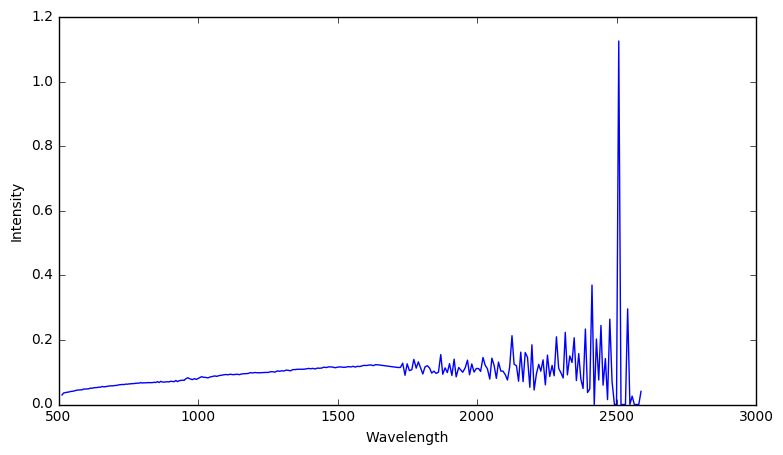

In [29]:
# Plot the first reflectance
plot_wavelength(point['ref1'])

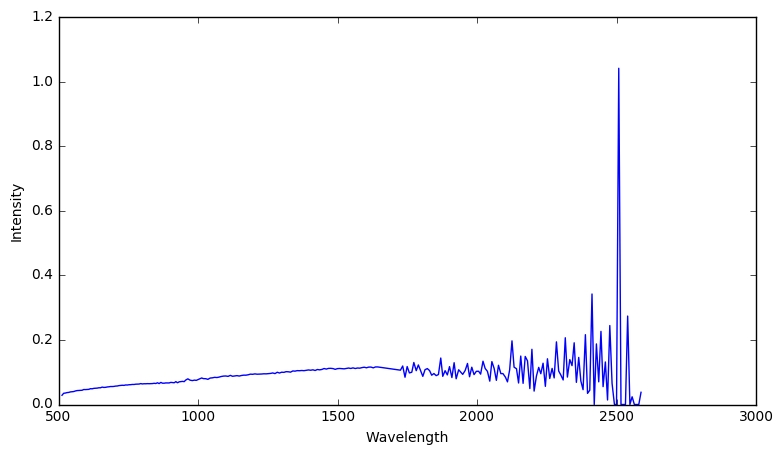

In [30]:
# Plot the secons reflectance
plot_wavelength(point['ref2'])

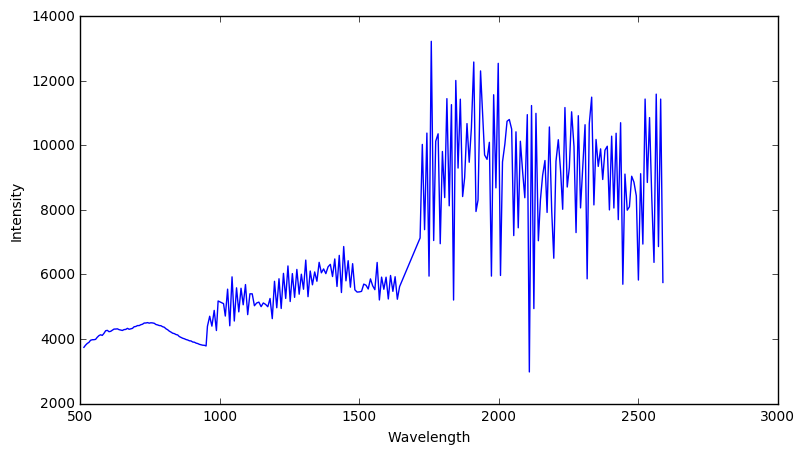

In [31]:
# Plot the RAW values
plot_wavelength(point['raw'])

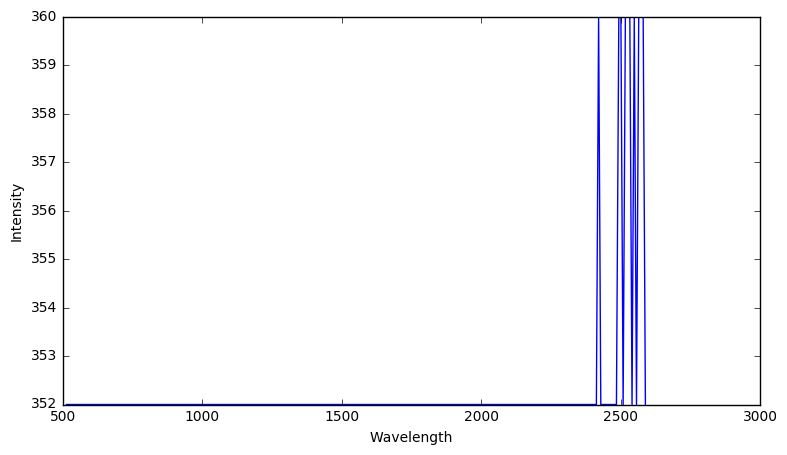

In [32]:
# get the quality vector
plot_wavelength(point['qa'])

In [33]:
# Get the meta data
point['meta']

{'CALIBRATION': 0.0,
 'CENTER_LATITUDE': -70.7620361511,
 'CENTER_LONGITUDE': 160.611921773,
 'CLOCK_COUNT_ERR_FLAG': 0.0,
 'DPU_TEMPERATURE': 12.3226003647,
 'EMISSION_ANGLE': 0.9519629478,
 'GEOMETRIC_INFO_RECAL_FLAG': 67.0,
 'HALOGEN_BULB_RADIANCE': 4.7589998245,
 'HALOGEN_BULB_TEMPERATURE1': 7.8099999428,
 'HALOGEN_BULB_TEMPERATURE2': 7.8099999428,
 'HALOGEN_BULB_VOLTAGE1': 4.7589998245,
 'HALOGEN_BULB_VOLTAGE2': 4.7589998245,
 'INCIDENCE_ANGLE': 80.4272918701,
 'NIR1_FOCAL_PLANE_TEMPERATURE': 16.4599990845,
 'NIR2_FOCAL_PLANE_TEMPERATURE': 243.0,
 'PHASE_ANGLE': 80.0595397949,
 'SOLAR_AZIMUTH_ANGLE': 299.1752624512,
 'SPACECRAFT_ALTITUDE': 100.4962005615,
 'SPACECRAFT_AZIMUTH': 6.3752999306,
 'SPACECRAFT_CLOCK_COUNT': 902206645.940682,
 'SPACECRAFT_GROUND_SPEED': 1.5443203449,
 'SPATIAL_RESOLUTION_FLAG': 65.0,
 'SPECTROMETER_TEMPERATURE_1': 16.7099990845,
 'SPECTROMETER_TEMPERATURE_2': 20.0,
 'SPECTROMETER_TEMPERATURE_3': 17.0499992371,
 'SPECTROMETER_TEMPERATURE_4': 22.4200000763